In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv('cars (1).csv')

In [4]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [5]:
features=df.iloc[:,:-1] # -> slicing for 2d
target=df.iloc[:,-1] # -> 1d

In [6]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [8]:
features['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [9]:
features['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [10]:
features.replace('?',np.nan,inplace=True)

In [11]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22


In [12]:
from sklearn.impute import SimpleImputer
si=SimpleImputer()
features[['normalized-losses','horsepower']]=si.fit_transform(features[['normalized-losses','horsepower']])

In [13]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22


### Features and target remove

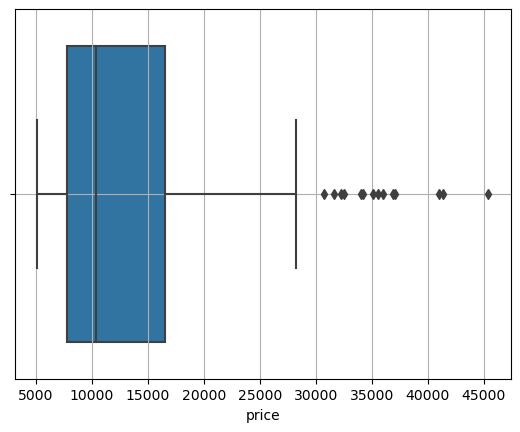

In [14]:
sns.boxplot(data=features,x=target)
plt.grid()
plt.show()

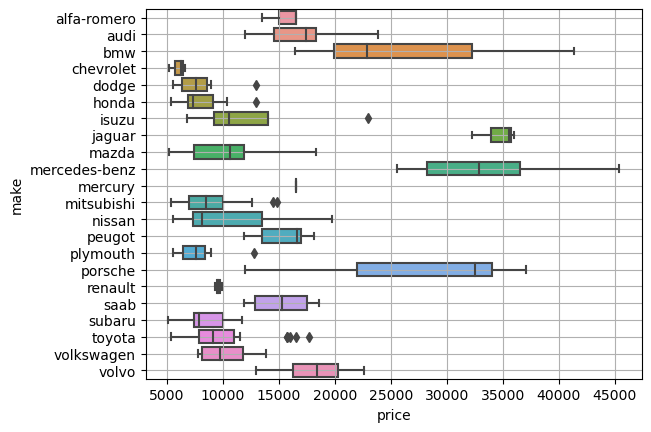

In [15]:
sns.boxplot(data=features,x=target,y='make')
plt.grid()
plt.show()

In [16]:
i=features[(features.make=='dodge') & (target>10000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

i=features[(features.make=='honda') & (target>12000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

i=features[(features.make=='isuzu') & (target>22000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

i=features[(features.make=='mitsubishi') & (target>12000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

i=features[(features.make=='toyota') & (target>15000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

i=features[(features.make=='plymouth') & (target>10000)].index
features.drop(i,axis=0,inplace=True)
target.drop(i,axis=0,inplace=True)

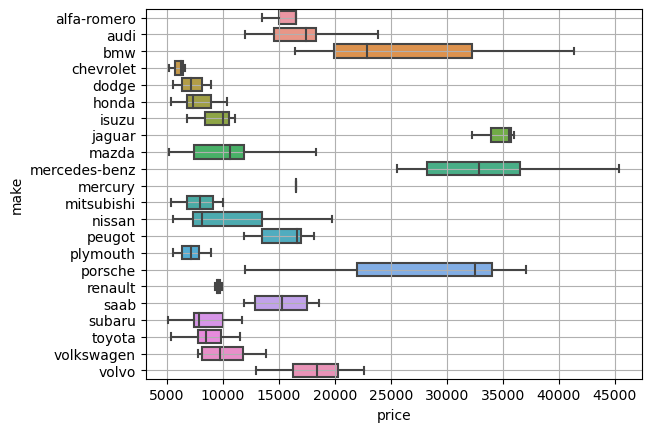

In [17]:
sns.boxplot(data=features,x=target,y='make')
plt.grid()
plt.show()

### Skewness removal

In [18]:
# Asymetry of data distribution
# Skewmess can be removed from only numerical data

In [19]:
# if the column which has skewness is showing good co-relation with the target do not remove the skewness
# if the column which has skewmess has negative values, do not remove the skewness

In [20]:
cols=features.select_dtypes(['int','float']).columns
cols

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [21]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22


In [22]:
# to remove skewness

from scipy.stats import skew

In [23]:
skew(features['normalized-losses'])

0.846315331460635

symboling
0.2147470605758054


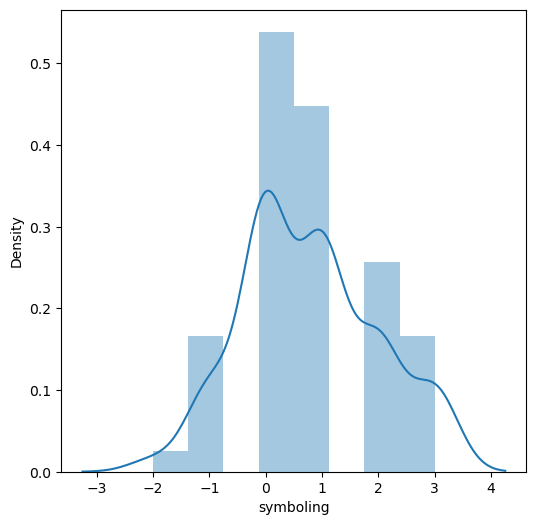

normalized-losses
0.846315331460635


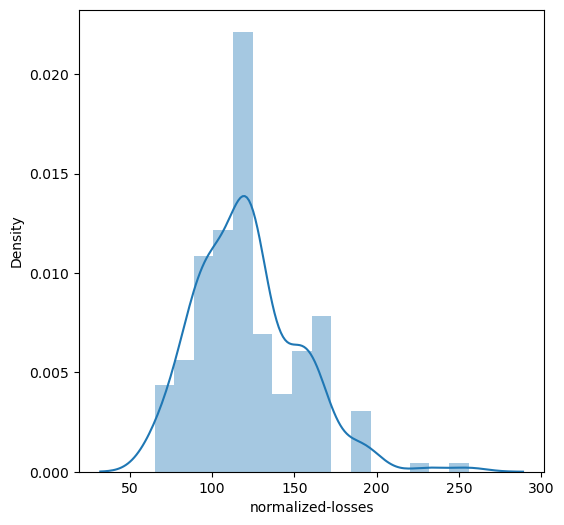

width
0.9147899492639983


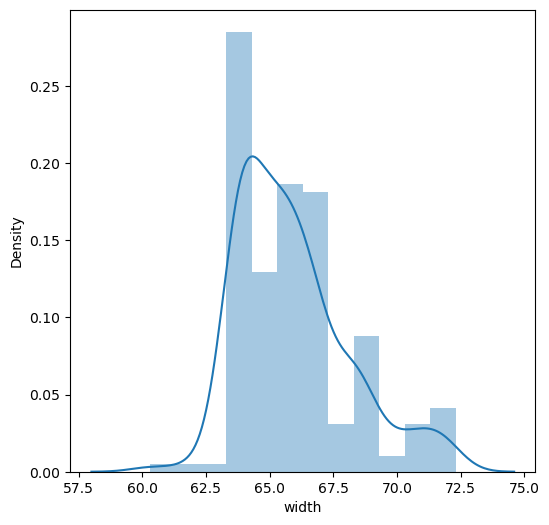

height
0.007986794777796822


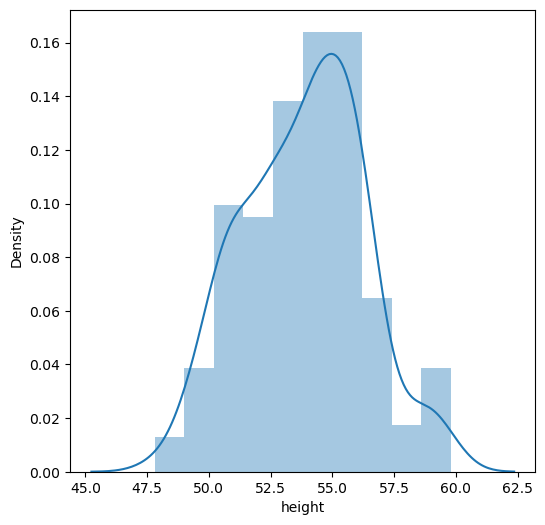

engine-size
2.0664919440355707


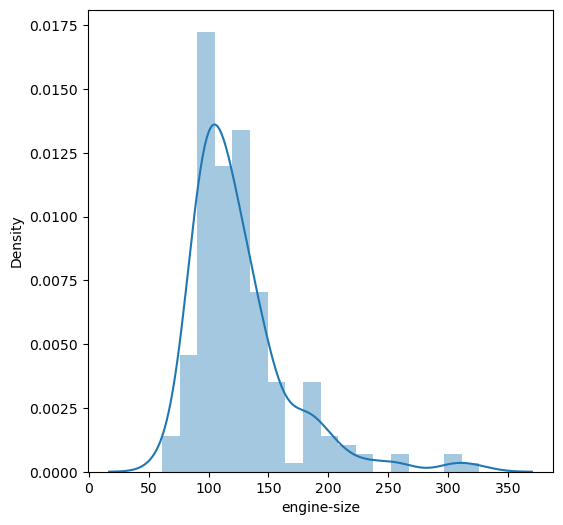

horsepower
1.576213559993105


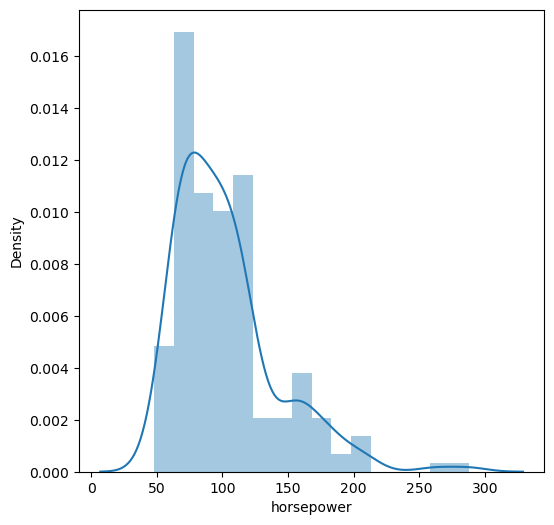

city-mpg
0.5925146641287237


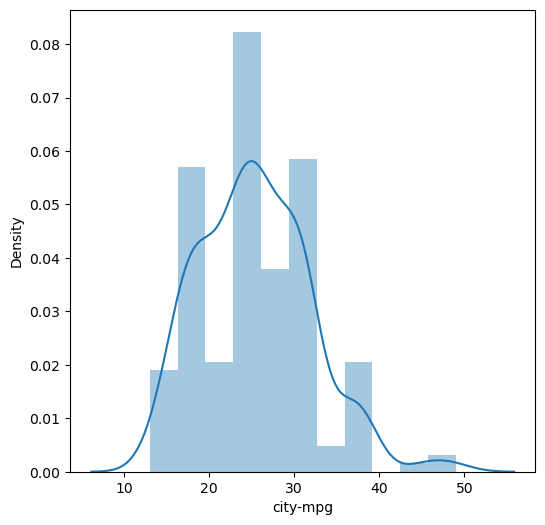

highway-mpg
0.4682909445793763


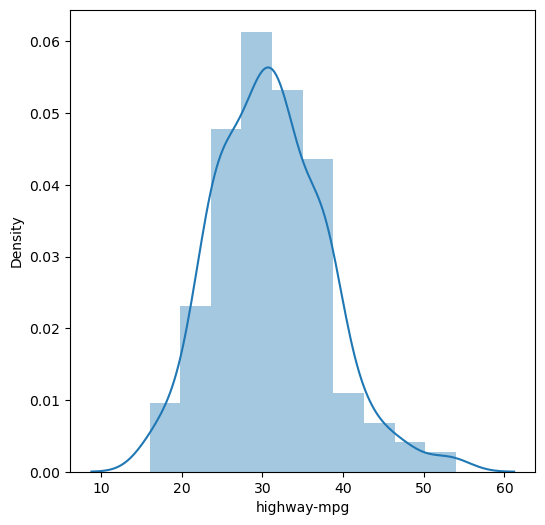

In [24]:
for i in features[cols]:
    print(i)
    print(skew(features[i]))
    
    plt.figure(figsize=(6,6))
    sns.distplot(features[i])
    plt.show()

In [25]:
np.log(-25)

nan

In [26]:
np.sqrt(-25)

nan

In [27]:
pd.concat([features,target],axis=1).corr().style.background_gradient()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.451747,-0.276653,-0.514788,-0.162258,0.016888,0.016773,0.095068,-0.096215
normalized-losses,0.451747,1.000000,0.066610,-0.370512,0.090309,0.183840,-0.212711,-0.169258,0.129980
width,-0.276653,0.066610,1.000000,0.299184,0.735478,0.644886,-0.642115,-0.678811,0.730630
height,-0.514788,-0.370512,0.299184,1.000000,0.102332,-0.070517,-0.087078,-0.152022,0.147417
engine-size,-0.162258,0.090309,0.735478,0.102332,1.000000,0.803428,-0.641501,-0.665951,0.871044
horsepower,0.016888,0.183840,0.644886,-0.070517,0.803428,1.000000,-0.796061,-0.759642,0.771608
city-mpg,0.016773,-0.212711,-0.642115,-0.087078,-0.641501,-0.796061,1.000000,0.969961,-0.682415
highway-mpg,0.095068,-0.169258,-0.678811,-0.152022,-0.665951,-0.759642,0.969961,1.000000,-0.707051
price,-0.096215,0.129980,0.730630,0.147417,0.871044,0.771608,-0.682415,-0.707051,1.000000


In [28]:
features['normalized-losses']=np.log(features['normalized-losses'])

In [29]:
skew(features['normalized-losses'])

0.020674302162479046

In [30]:
# Pandas: get_dummies()
# Sklearn: OneHotEncoder()

In [31]:
pd.get_dummies(features['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [32]:
pd.get_dummies(features['make'])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
ohe=OneHotEncoder()
ohe.fit_transform(features[['make']]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Label Encoder

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
le.fit_transform(features['make'])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21])

In [38]:
# le.fit_transform(features[['make','fuel-type']])

# output shows -> y should be a 1d array, got an array of shape (193, 2) instead. because it targets only one column

### Ordinal Encoder

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
oe=OrdinalEncoder()

In [41]:
oe.fit_transform(features[['make']])

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 7.],
       [ 7.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 9.],
       [ 9.],
       [ 9.],
       [ 9.],
       [ 9.],
       [ 9.],
       [ 9.],
      

In [42]:
oe.fit_transform(features[['make','fuel-type']])

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 6.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 7.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,  1.],
       [ 8.,

In [43]:
cols=features.select_dtypes(object).columns

In [44]:
cols

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [45]:
(features[cols])=oe.fit_transform(features[cols])

In [46]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22


### Scaling/Feature Scaling

In [47]:
# MinMaxScaler --> 0 to 1
# StandardScaler --> negative infinity to positive infinity

In [48]:
a=np.array([1,2,3,4,5])
b=np.array([10,20,30,40,50])
c=np.array([100,200,300,400,500])

In [49]:
# xnew=(x-min)/(max-min)

In [50]:
def minmax(arr):
    xnew=(arr-arr.min())/(arr.max()-arr.min())
    return xnew

In [51]:
minmax(a)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [52]:
minmax(b)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [53]:
minmax(c)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
mn=MinMaxScaler()

In [56]:
#features.iloc[:,:]=mn.fit_transform(features.iloc[:,:])

In [57]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22


### Standard Scaling

In [58]:
# xnew= x-mean()/std

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc=StandardScaler()
features.iloc[:,:]=sc.fit_transform(features.iloc[:,:])

In [61]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.867513,0.146538,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-0.817748,-2.071007,-3.103277,0.107874,0.224311,-0.680796,-0.585808
1,1.867513,0.146538,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-0.817748,-2.071007,-3.103277,0.107874,0.224311,-0.680796,-0.585808
2,0.187187,0.146538,-1.930113,0.34001,-0.752016,1.229517,-0.125656,-0.178224,-0.591990,1.938242,0.631937,1.321612,-0.987075,-0.731505
3,1.027350,1.312799,-1.771124,0.34001,0.427976,-0.568186,-0.125656,0.141538,0.188602,-0.078366,-0.392369,-0.005357,-0.221378,-0.148717
4,1.027350,1.312799,-1.771124,0.34001,0.427976,-2.365889,-0.125656,0.232898,0.188602,-0.078366,0.250800,0.326386,-1.140215,-1.314294


### Feature Engineering

In [62]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.867513,0.146538,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-0.817748,-2.071007,-3.103277,0.107874,0.224311,-0.680796,-0.585808
1,1.867513,0.146538,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-0.817748,-2.071007,-3.103277,0.107874,0.224311,-0.680796,-0.585808
2,0.187187,0.146538,-1.930113,0.34001,-0.752016,1.229517,-0.125656,-0.178224,-0.591990,1.938242,0.631937,1.321612,-0.987075,-0.731505
3,1.027350,1.312799,-1.771124,0.34001,0.427976,-0.568186,-0.125656,0.141538,0.188602,-0.078366,-0.392369,-0.005357,-0.221378,-0.148717
4,1.027350,1.312799,-1.771124,0.34001,0.427976,-2.365889,-0.125656,0.232898,0.188602,-0.078366,0.250800,0.326386,-1.140215,-1.314294


In [63]:
features['Area']=features['width']*features['height']

In [64]:
features.drop(['width','height'],axis=1,inplace=True)

In [65]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,engine-size,horsepower,city-mpg,highway-mpg,Area
0,1.867513,0.146538,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-3.103277,0.107874,0.224311,-0.680796,-0.585808,1.693561
1,1.867513,0.146538,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-3.103277,0.107874,0.224311,-0.680796,-0.585808,1.693561
2,0.187187,0.146538,-1.930113,0.34001,-0.752016,1.229517,-0.125656,1.938242,0.631937,1.321612,-0.987075,-0.731505,0.105507
3,1.027350,1.312799,-1.771124,0.34001,0.427976,-0.568186,-0.125656,-0.078366,-0.392369,-0.005357,-0.221378,-0.148717,0.026694
4,1.027350,1.312799,-1.771124,0.34001,0.427976,-2.365889,-0.125656,-0.078366,0.250800,0.326386,-1.140215,-1.314294,0.043925


### Split the data into training and testing

In [66]:
# random state is a hyper parameter to get the same train and test values so that the accuracy does not change

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.20,random_state=1)

In [69]:
xtrain

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,engine-size,horsepower,city-mpg,highway-mpg,Area
165,0.187187,1.407795,1.090683,0.340010,0.427976,1.229517,-0.125656,-3.103277,-0.654401,0.249830,0.084901,-0.294414,0.440195
119,0.187187,0.048389,0.295737,0.340010,-0.752016,-0.568186,-0.125656,-0.078366,-0.654401,-0.005357,-0.221378,-0.148717,1.192847
186,1.027350,-0.881278,1.249672,0.340010,0.427976,-0.568186,-0.125656,-0.078366,-0.392369,-0.439173,0.238041,0.434072,-0.136123
145,-0.652977,-0.559293,0.931694,0.340010,0.427976,-2.365889,-0.125656,0.929938,-0.416190,0.224311,-0.221378,-0.294414,-0.042229
158,-0.652977,-1.009142,1.090683,-2.941088,0.427976,-0.568186,-0.125656,-0.078366,-0.368548,-1.179214,1.310017,0.725466,0.235176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1.027350,-1.371893,0.931694,0.340010,-0.752016,-2.365889,-0.125656,0.929938,-0.416190,-0.745397,0.084901,-0.003020,-0.729244
144,-0.652977,-0.559293,0.931694,0.340010,0.427976,-2.365889,-0.125656,0.929938,-0.416190,-0.515729,-0.221378,-0.877202,-0.042229
75,0.187187,0.146538,-0.340221,0.340010,-0.752016,1.229517,-0.125656,-0.078366,0.346084,1.857504,-0.987075,-1.022899,0.379751
147,-0.652977,-1.096749,0.931694,0.340010,1.607969,-0.568186,-0.125656,0.929938,-0.416190,-0.209506,-0.068238,-0.003020,0.077356
